In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import naive_bayes
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import cluster
#pd.options.display.max_rows = 999
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.expand_frame_repr', False)
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import time

In [2]:
listings = gpd.GeoDataFrame.from_file('Data/NYClisting.geojson')

In [3]:
listings.head(3)

,Median_income,Median_rent,accesstosubway,availability_365,beer_count,boro_ct_2010,calculated_host_listings_count,coffee_count,connectivityScore,geometry,host_id,host_name,id,index_left,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type
0,21855,1287,8.368050,242,0,2002400,10,0,0.0,POINT (-73.86406089014145 40.81274651012037),525710,Libby,14880182,1.0,2017-02-08,40.812747,-73.864061,2,Community Living in the Heart & Soul of NYC (3C),Clason Point,Bronx,9,59,1.53,Private room
1,21855,1287,8.380864,365,0,2000200,10,0,0.0,POINT (-73.86381389361847 40.81293405229447),525710,Libby,15359150,1.0,2017-02-10,40.812934,-73.863814,2,"Private Room for 2, Community House NYC (2A)",Clason Point,Bronx,2,43,0.42,Private room
2,21855,1287,8.406552,336,0,2000200,10,0,0.0,POINT (-73.86370502873359 40.81359965937455),525710,Libby,15359306,1.0,2017-01-09,40.813600,-73.863705,1,King sized bed + futon in Large Private Room ...,Clason Point,Bronx,6,76,1.37,Private room


In [4]:
listings.columns.tolist()

[u'Median_income',
 u'Median_rent',
 u'accesstosubway',
 u'availability_365',
 u'beer_count',
 u'boro_ct_2010',
 u'calculated_host_listings_count',
 u'coffee_count',
 u'connectivityScore',
 'geometry',
 u'host_id',
 u'host_name',
 u'id',
 u'index_left',
 u'last_review',
 u'latitude',
 u'longitude',
 u'minimum_nights',
 u'name',
 u'neighbourhood',
 u'neighbourhood_group',
 u'number_of_reviews',
 u'price',
 u'reviews_per_month',
 u'room_type']

In [5]:
col = [u'Median_income',
     u'Median_rent',
     #u'accesstosubway',
     u'availability_365',
     u'beer_count',
     #u'boro_ct_2010',
     #u'calculated_host_listings_count',
     u'coffee_count',
     u'connectivityScore',
     #'geometry',
     #u'host_id',
     #u'host_name',
     #u'id',
     #u'index_left',
     #u'last_review',
     #u'latitude',
     #u'longitude',
     u'minimum_nights',
     #u'name',
     #u'neighbourhood',
     #u'neighbourhood_group',
     u'number_of_reviews',
     u'price',
     u'reviews_per_month',
     u'room_type']

In [6]:
listings[col].head(3)

,Median_income,Median_rent,availability_365,beer_count,coffee_count,connectivityScore,minimum_nights,number_of_reviews,price,reviews_per_month,room_type
0,21855,1287,242,0,0,0.0,2,9,59,1.53,Private room
1,21855,1287,365,0,0,0.0,2,2,43,0.42,Private room
2,21855,1287,336,0,0,0.0,1,6,76,1.37,Private room


In [7]:
listings[col].dtypes

Median_income         object
Median_rent           object
availability_365       int64
beer_count             int64
coffee_count           int64
connectivityScore    float64
minimum_nights         int64
number_of_reviews      int64
price                  int64
reviews_per_month    float64
room_type             object
dtype: object

In [8]:
listings.Median_income = pd.to_numeric(listings.Median_income, errors='coerce')
listings.Median_rent = pd.to_numeric(listings.Median_rent, errors='coerce')

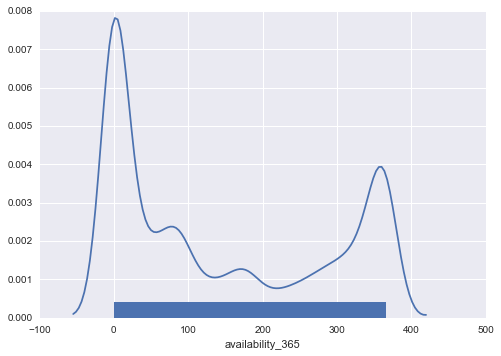

In [9]:
sns.distplot(listings.availability_365, hist=False, rug=True)

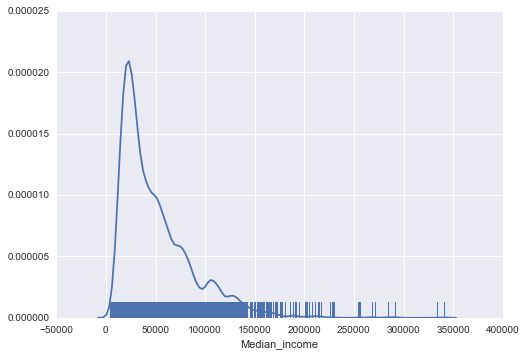

In [10]:
sns.distplot(listings.Median_income, hist=False, rug=True)

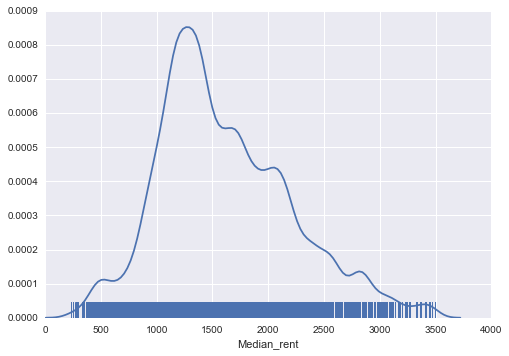

In [11]:
sns.distplot(listings.Median_rent, hist=False, rug=True)

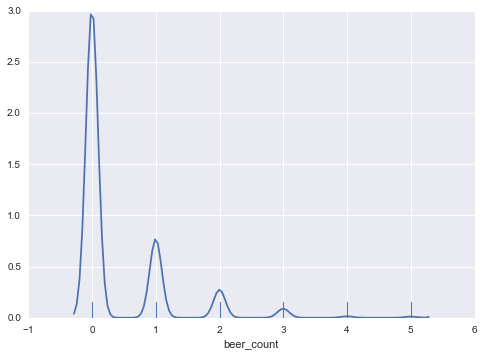

In [12]:
sns.distplot(listings.beer_count, hist=False, rug=True)

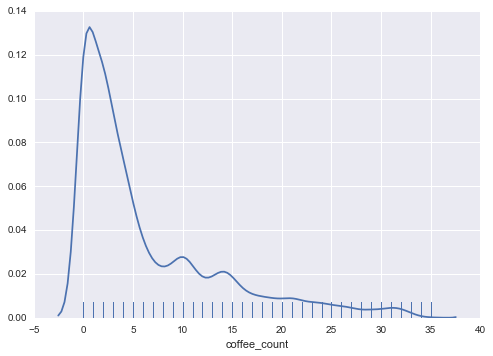

In [13]:
sns.distplot(listings.coffee_count, hist=False, rug=True)

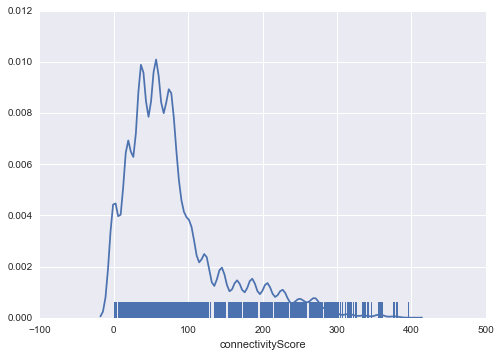

In [14]:
sns.distplot(listings.connectivityScore, hist=False, rug=True)

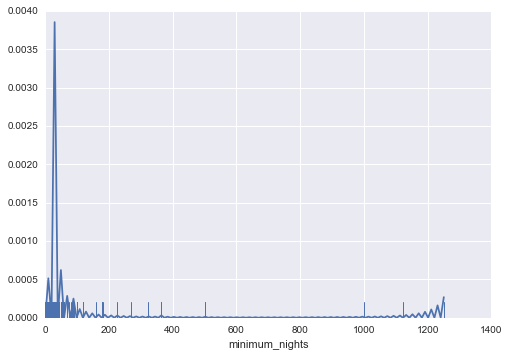

In [15]:
sns.distplot(listings.minimum_nights, hist=False, rug=True)

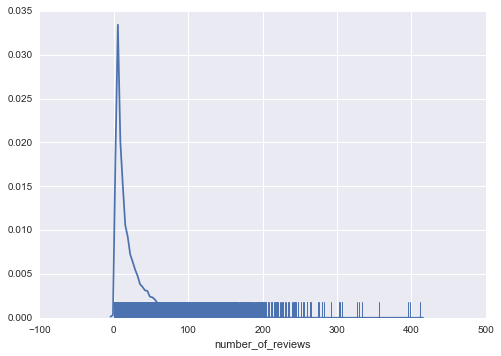

In [16]:
sns.distplot(listings.number_of_reviews, hist=False, rug=True)

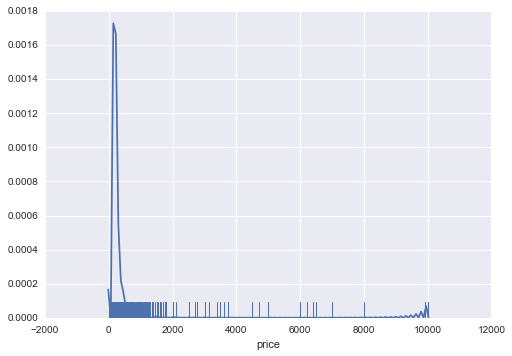

In [17]:
sns.distplot(listings.price, hist=False, rug=True)

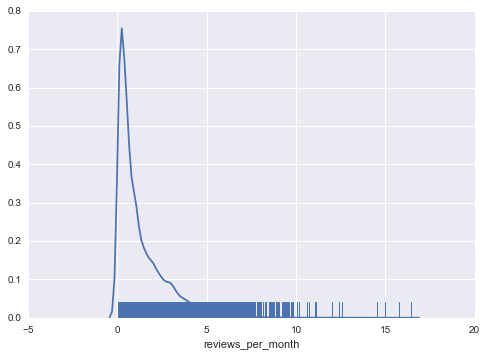

In [18]:
sns.distplot(listings.reviews_per_month, hist=False, rug=True)

In [19]:
listings.room_type.unique()

array([u'Private room', u'Entire home/apt', u'Shared room'], dtype=object)

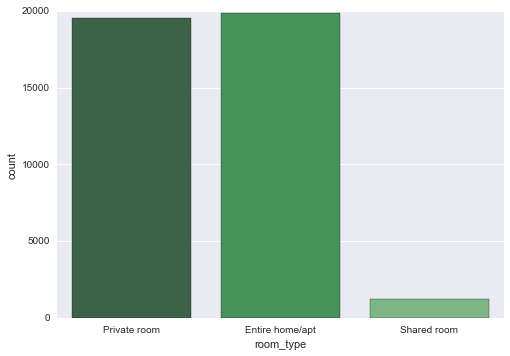

In [20]:
sns.countplot(x=listings.room_type, data=listings, palette="Greens_d");

In [21]:
listings['Private_room'] = 0
listings['Entire_home/apt'] = 0
listings['Shared_room'] = 0

In [22]:
def private(roomtype):
    if roomtype=='Private room':
        return 1
    else:
        return 0
def entire(roomtype):
    if roomtype=='Entire home/apt':
        return 1
    else:
        return 0
def shared(roomtype):
    if roomtype=='Shared room':
        return 1
    else:
        return 0

In [23]:
listings['Private_room'] = listings.room_type.map(private)
listings['Entire_home/apt'] = listings.room_type.map(entire)
listings['Shared_room'] = listings.room_type.map(shared)

### Feature selection 

In [24]:
features = list(listings.columns)

In [25]:
features =[u'Median_income',
     u'Median_rent',
     #u'accesstosubway',
     u'availability_365',
     u'beer_count',
     #u'boro_ct_2010',
     #u'calculated_host_listings_count',
     u'coffee_count',
     u'connectivityScore',
     #'geometry',
     #u'host_id',
     #u'host_name',
     #u'id',
     #u'index_left',
     #u'last_review',
     #u'latitude',
     #u'longitude',
     #u'minimum_nights',
     #u'name',
     #u'neighbourhood',
     #u'neighbourhood_group',
     u'number_of_reviews',
     u'price',
     #u'reviews_per_month',
     #u'room_type',
     'Private_room',
     'Entire_home/apt',
     'Shared_room'
          ]
features

[u'Median_income',
 u'Median_rent',
 u'availability_365',
 u'beer_count',
 u'coffee_count',
 u'connectivityScore',
 u'number_of_reviews',
 u'price',
 'Private_room',
 'Entire_home/apt',
 'Shared_room']

### Clean Nan Values

In [26]:
len(listings)

40586

In [27]:
listings[features].isnull().any(axis=1).sum()

1174

In [28]:
reduced = listings[listings[features].isnull().any(axis=1)==False]

In [29]:
len(reduced)

39412

In [30]:
reduced[features].isnull().any(axis=1).sum()

0

In [ ]:
reduced.columnsumns

In [ ]:
reduced.head(3)

In [ ]:
with open('Data/CleanNYClistings.geojson', 'w') as f:
    f.write(reduced.to_json())

### Spectral CLustering

In [31]:
reduced.head(3)

,Median_income,Median_rent,accesstosubway,availability_365,beer_count,boro_ct_2010,calculated_host_listings_count,coffee_count,connectivityScore,geometry,host_id,host_name,id,index_left,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type,Private_room,Entire_home/apt,Shared_room
0,21855.0,1287.0,8.368050,242,0,2002400,10,0,0.0,POINT (-73.86406089014145 40.81274651012037),525710,Libby,14880182,1.0,2017-02-08,40.812747,-73.864061,2,Community Living in the Heart & Soul of NYC (3C),Clason Point,Bronx,9,59,1.53,Private room,1,0,0
1,21855.0,1287.0,8.380864,365,0,2000200,10,0,0.0,POINT (-73.86381389361847 40.81293405229447),525710,Libby,15359150,1.0,2017-02-10,40.812934,-73.863814,2,"Private Room for 2, Community House NYC (2A)",Clason Point,Bronx,2,43,0.42,Private room,1,0,0
2,21855.0,1287.0,8.406552,336,0,2000200,10,0,0.0,POINT (-73.86370502873359 40.81359965937455),525710,Libby,15359306,1.0,2017-01-09,40.813600,-73.863705,1,King sized bed + futon in Large Private Room ...,Clason Point,Bronx,6,76,1.37,Private room,1,0,0


In [32]:
sample = reduced.sample(5000, random_state=123)

In [33]:
X = sample[features]

In [34]:
X.head(3)

,Median_income,Median_rent,availability_365,beer_count,coffee_count,connectivityScore,number_of_reviews,price,Private_room,Entire_home/apt,Shared_room
20972,97057.0,2385.0,0,1,32,270.0,0,100,1,0,0
5458,46947.0,1701.0,89,0,2,50.0,0,150,0,1,0
4441,28072.0,1350.0,358,2,3,96.0,7,379,0,1,0


In [35]:
start_time = time.time()

Xspec = SpectralClustering(n_clusters = 5)
cl=Xspec.fit(X).labels_

print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\ferna\Anaconda2\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


--- 5.21599984169 seconds ---


In [36]:
sample['spectral'] = cl

In [37]:
result2 = [str(x) for x in cl.tolist()]
sample['spectralCat'] = result2

In [38]:
set(cl)

{0, 1, 2, 3, 4}

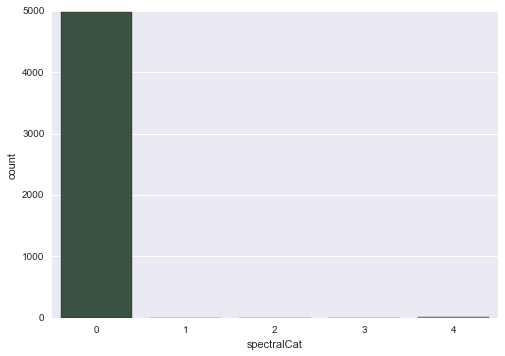

In [39]:
sns.countplot(x=sample['spectralCat'], data=sample, palette="Greens_d");

In [40]:
sample.groupby(sample['spectralCat']).count()

,Median_income,Median_rent,accesstosubway,availability_365,beer_count,boro_ct_2010,calculated_host_listings_count,coffee_count,connectivityScore,geometry,host_id,host_name,id,index_left,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type,Private_room,Entire_home/apt,Shared_room,spectral,spectralCat
spectralCat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4986,4986,4986,4986,4986,4986,4986,4986,4986,4986,4986,4984,4986,4986,3815,4986,4986,4986,4986,4986,4986,4986,4986,3815,4986,4986,4986,4986,4986,4986
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2
2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2
4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,3,6,6,6,6,6,6,6,6,3,6,6,6,6,6,6


In [41]:
colors = {0:'red', 1:'blue', 2:'green', 3:'purple', 4: 'orange'}

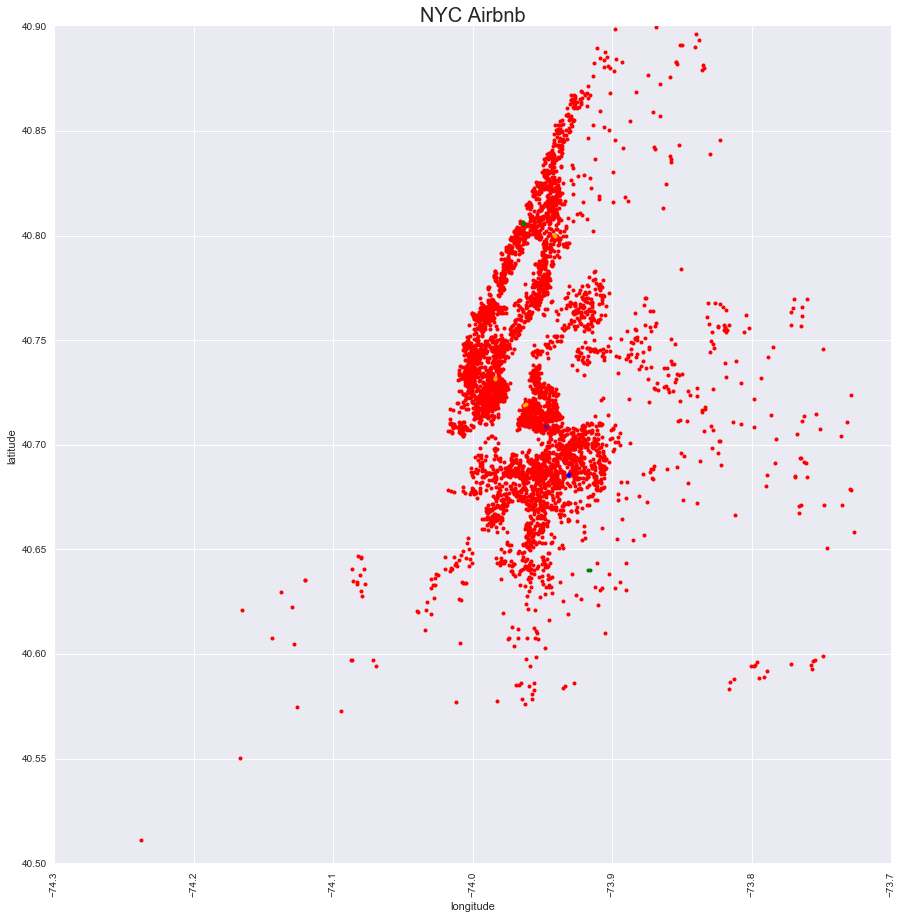

In [42]:
f, ax = plt.subplots(figsize=(15,15))
sample[sample['spectral'] == 0].plot(color='r', legend=True,ax = ax, markersize=4)
sample[sample['spectral'] == 1].plot(color='b', legend=True,ax = ax, markersize=4)
sample[sample['spectral'] == 2].plot(color='g', legend=True,ax = ax, markersize=4)
sample[sample['spectral'] == 3].plot(color='purple', legend=True,ax = ax, markersize=4)
sample[sample['spectral'] == 4].plot(color='orange', legend=True,ax = ax, markersize=4)

plt.xlabel('longitude')
plt.ylabel('latitude')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("NYC Airbnb", size=20)

In [43]:
features

[u'Median_income',
 u'Median_rent',
 u'availability_365',
 u'beer_count',
 u'coffee_count',
 u'connectivityScore',
 u'number_of_reviews',
 u'price',
 'Private_room',
 'Entire_home/apt',
 'Shared_room']

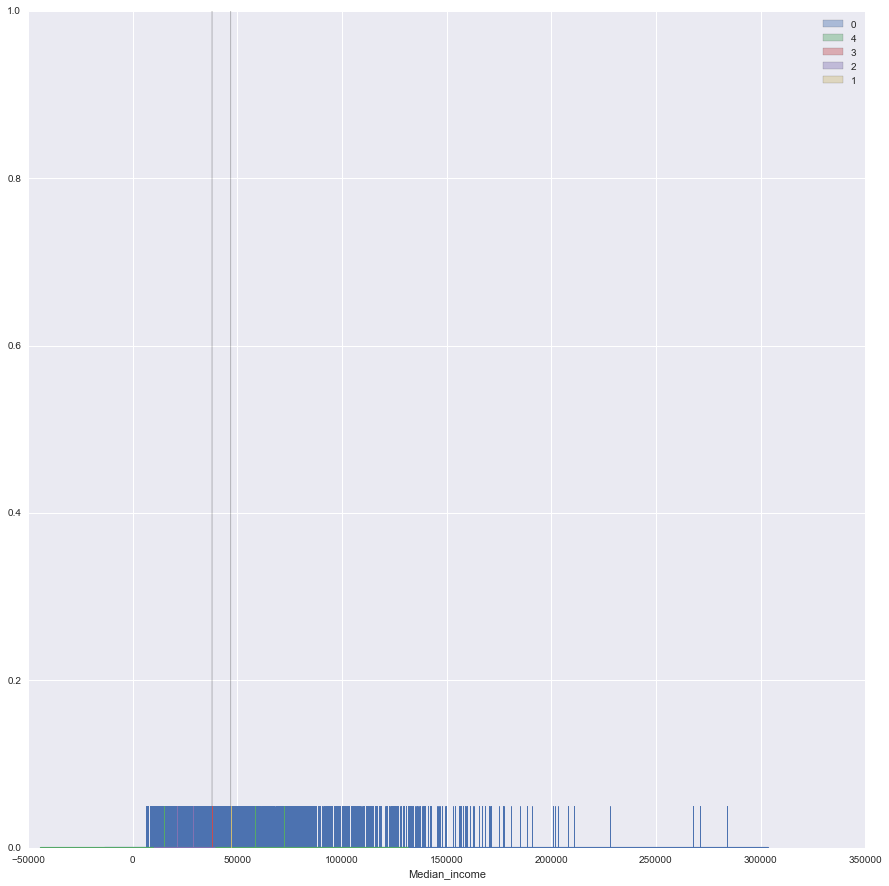

In [44]:
f, ax = plt.subplots(figsize=(15,15))
sns.distplot(sample[sample['spectral'] == 0]['Median_income'], hist=True, rug=True, label='0')
sns.distplot(sample[sample['spectral'] == 4]['Median_income'], hist=True, rug=True, label='4')
sns.distplot(sample[sample['spectral'] == 3]['Median_income'], hist=True, rug=True, label='3')
sns.distplot(sample[sample['spectral'] == 2]['Median_income'], hist=True, rug=True, label='2')
sns.distplot(sample[sample['spectral'] == 1]['Median_income'], hist=True, rug=True, label='1')

plt.legend()

In [45]:
from scipy import stats

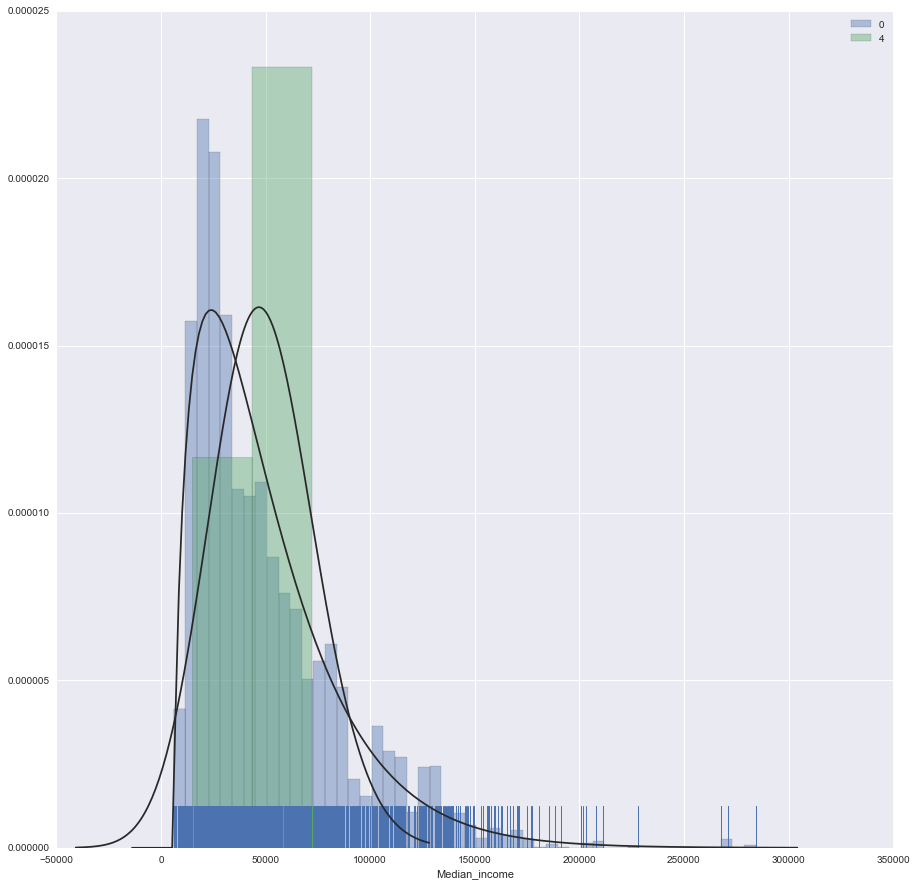

In [46]:
f, ax = plt.subplots(figsize=(15,15))
sns.distplot(sample[sample['spectral'] == 0]['Median_income'], kde=False, fit=stats.gamma, rug=True, label='0')
sns.distplot(sample[sample['spectral'] == 4]['Median_income'], kde=False, fit=stats.gamma, rug=True, label='4')
#sns.distplot(sample[sample['spectral'] == 3]['Median_income'], kde=False, fit=stats.gamma, rug=True, label='3')
#sns.distplot(sample[sample['spectral'] == 2]['Median_income'], kde=False, fit=stats.gamma, rug=True, label='2')
#sns.distplot(sample[sample['spectral'] == 1]['Median_income'], kde=False, fit=stats.gamma, rug=True, label='1')

plt.legend()